# Import and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\olona\Downloads\DATA SCIENCE\jose portilla\22 - K-Means Clustering\CIA-Country-Facts.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


***

# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


***

### Let's create some visualizations

<AxesSubplot:xlabel='Population', ylabel='Count'>

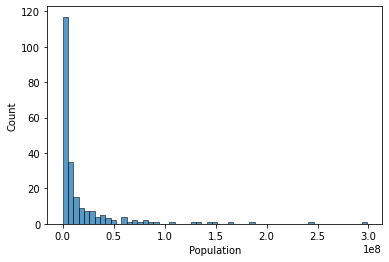

In [5]:
#population histogram
sns.histplot(data=df[df['Population']< 500000000], x='Population')

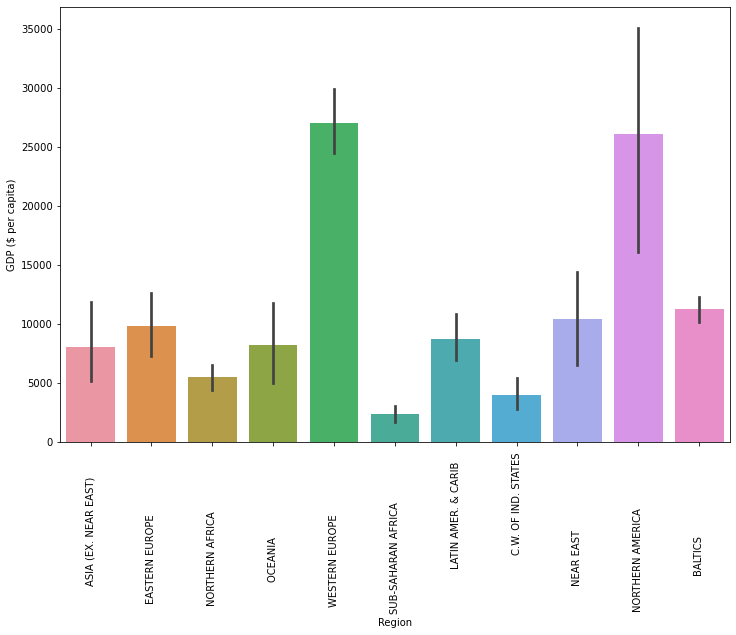

In [6]:
#Region vs GDP
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Region',y='GDP ($ per capita)', estimator=np.mean)
plt.xticks(rotation=90);


##### Western Europe has the highest GDP while sub-saharan Africa has the lowest

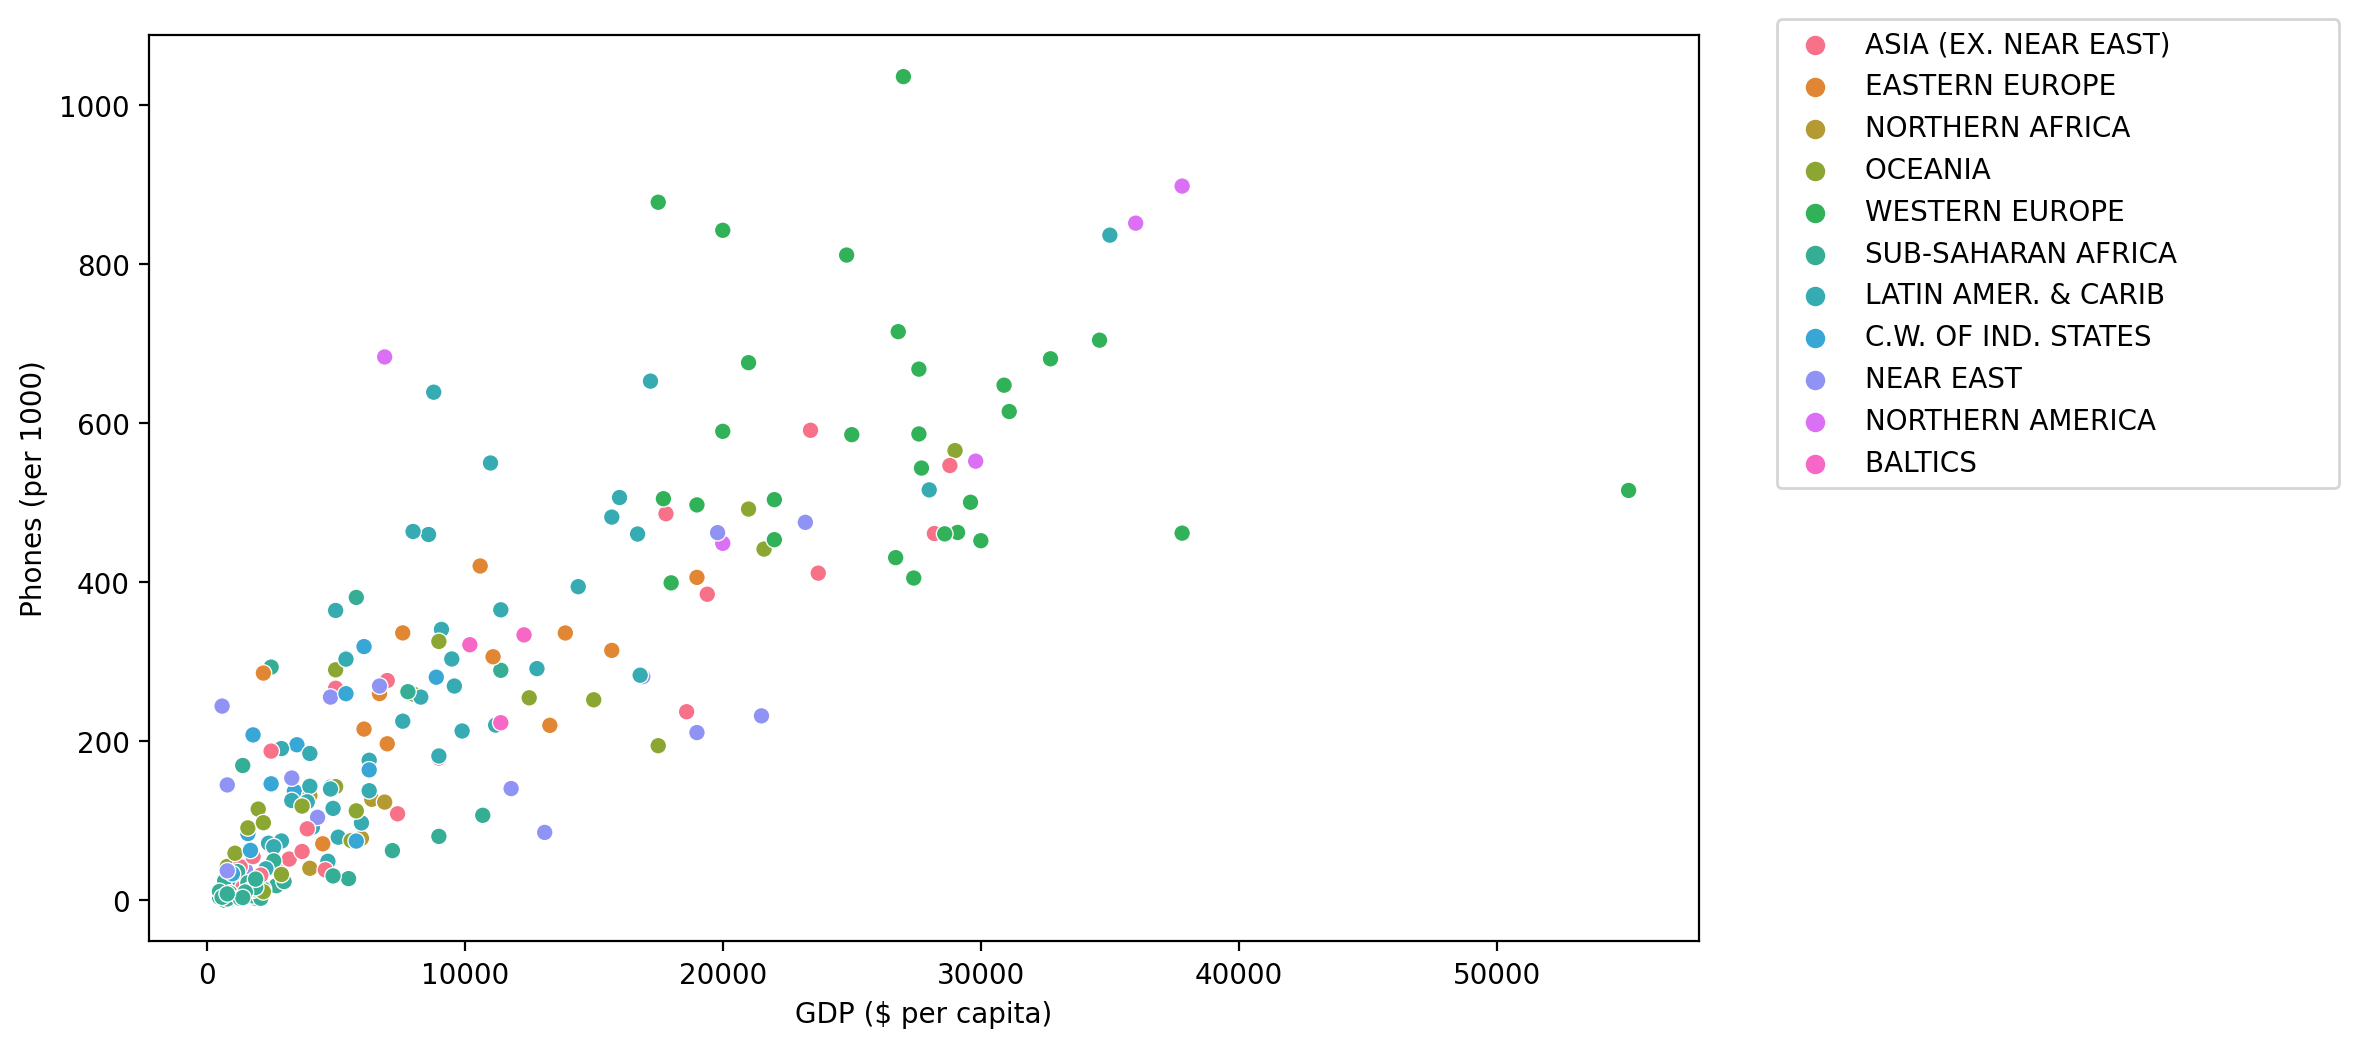

In [7]:
#Phone per 1000 vs GDP
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

##### 1. There is a linear relationship between phones per 1000 and GDP. So we can see that Western Europe has the highest phones per 100
##### 2. Although the country with the highest GDP has a median amount phones per 1000 

In [8]:
#let's look at the country with the highest phones per 1000. Has more phones than people
df.loc[df['Phones (per 1000)'].idxmax()][['Country','Region']]

Country                                 Monaco
Region     WESTERN EUROPE                     
Name: 138, dtype: object

In [9]:
#Let's look at the country with the highest GDP and its number of phones per 10000 and population.
# The country has a very small population and is super distorted based off its population. Hence, the little number of phones per 1000
df.loc[df['GDP ($ per capita)'].idxmax()][['Country','Region','Phones (per 1000)','Population']]

Country                                       Luxembourg
Region               WESTERN EUROPE                     
Phones (per 1000)                                  515.4
Population                                        474413
Name: 121, dtype: object

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

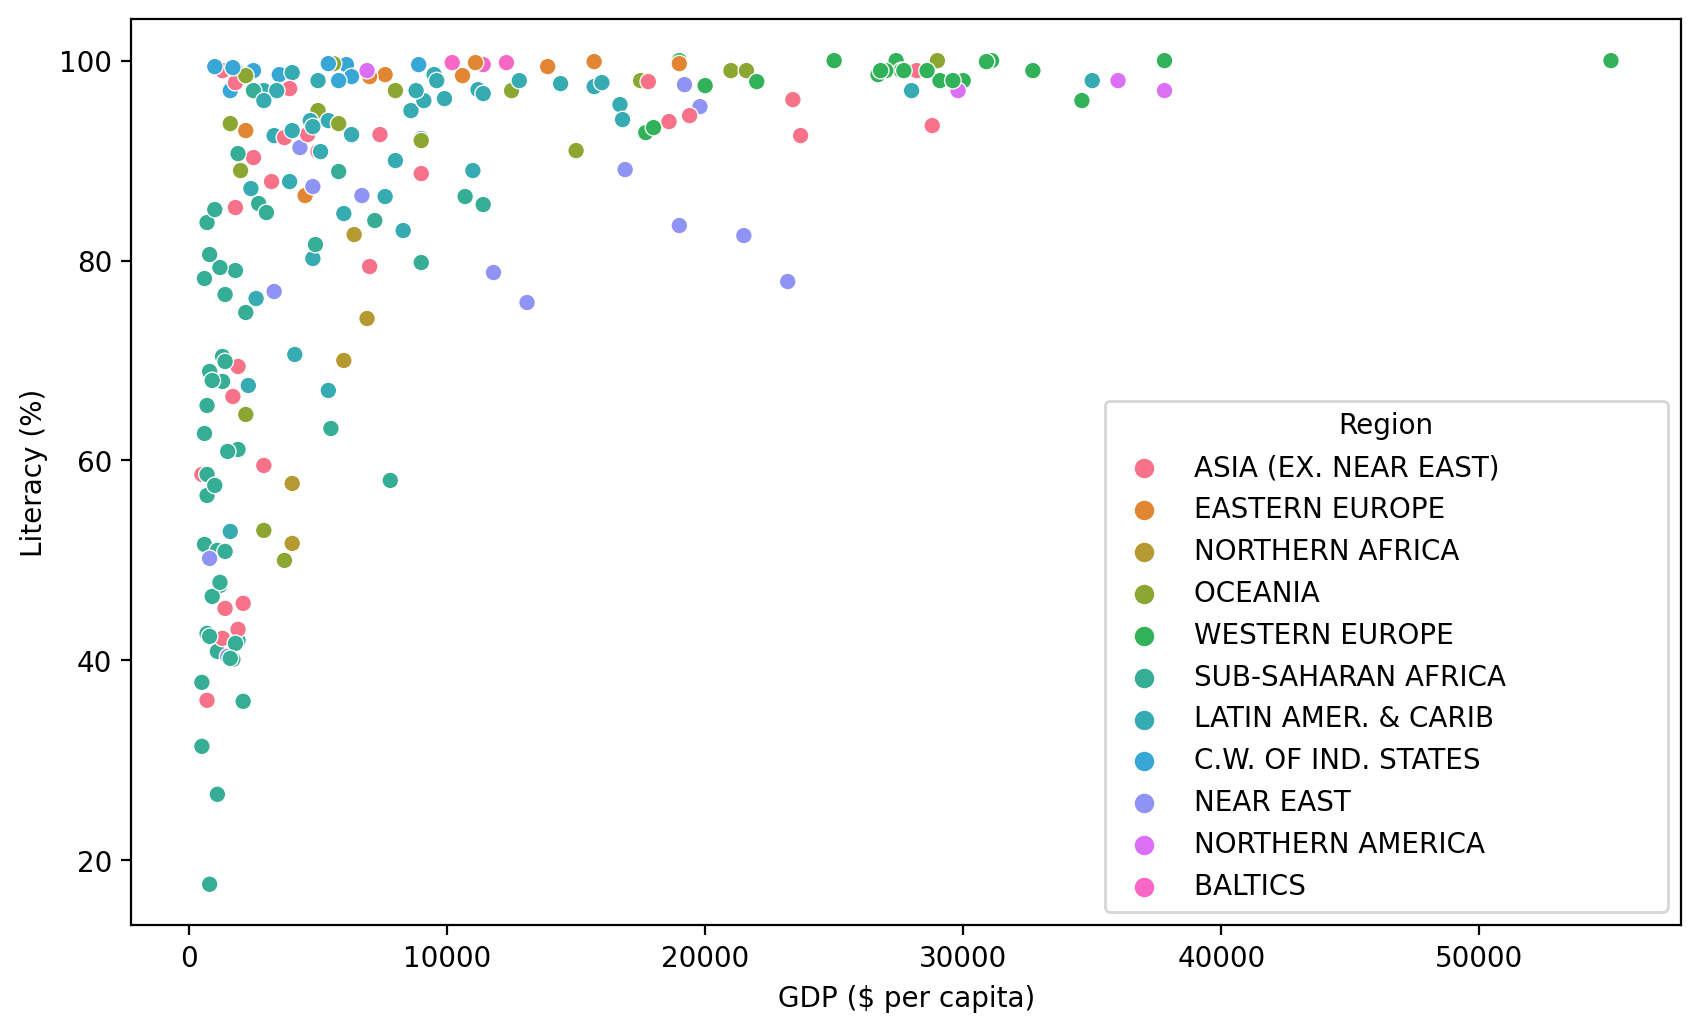

In [10]:
#Literacy vs GDP per capita
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

##### Literacy level is very dominantly low in the sub saharan region. It is steadily high in many regions with high GDP.
##### You would notice that countries below around 80% literacy have GDP as low as 10000 with a few exceptions near EAST who have close to mid-range GDP.
##### Notice that some countries have high literacy rate and low GDP which means that high literacy rate does not necessarily guarantee a high GDP

<AxesSubplot:>

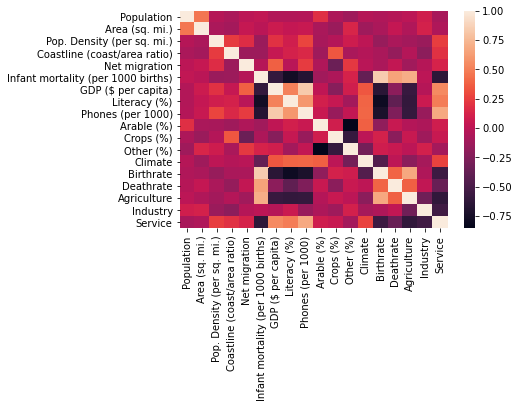

In [11]:
#heatmap
sns.heatmap(df.corr())

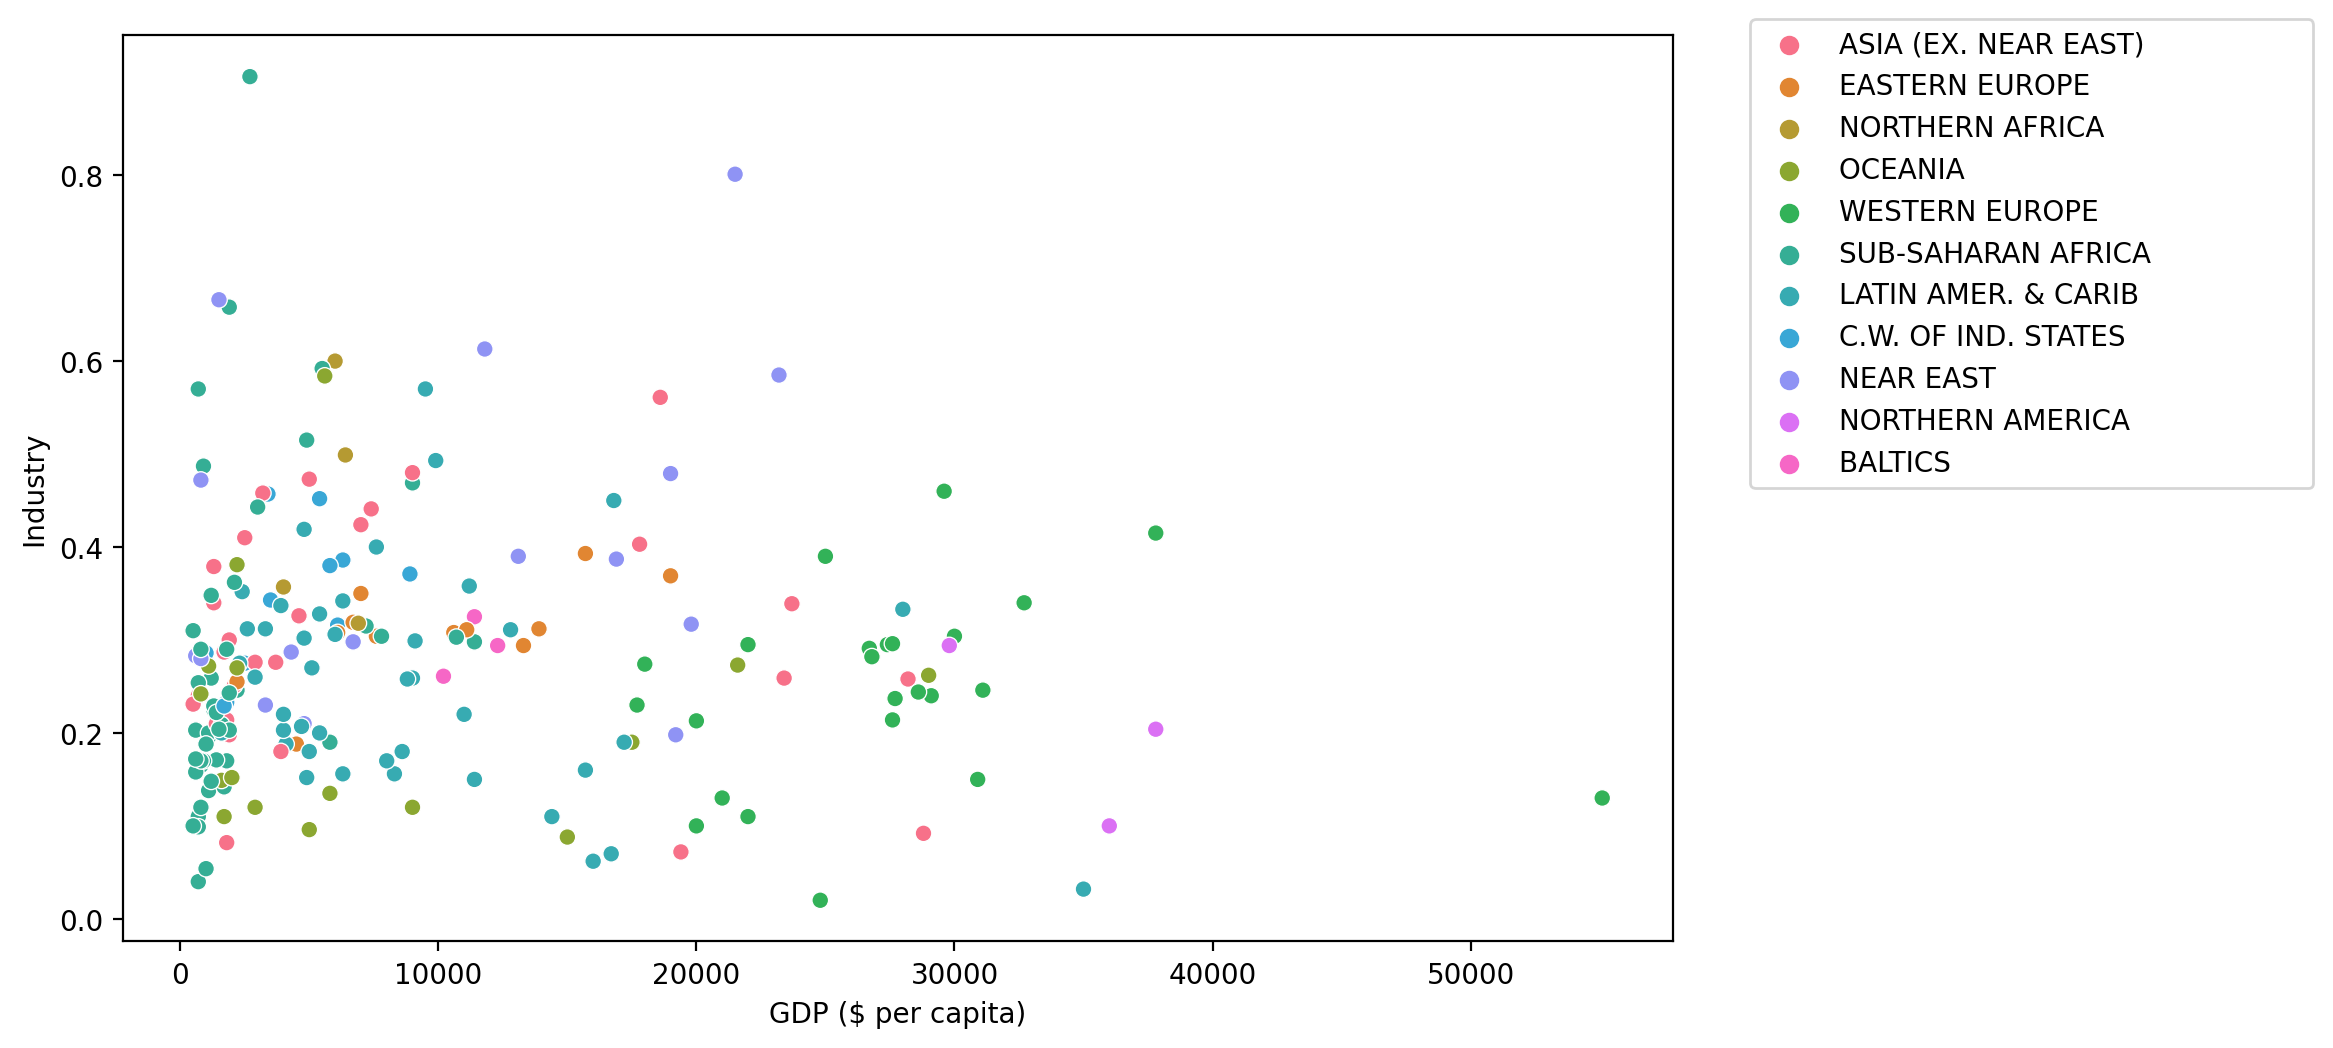

In [12]:
#Industry versus GDP
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Industry',hue='Region')
plt.legend(loc=(1.05,0.5))

# Feature engineering

In [13]:
#let's seen the number of missing elements per column
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

##### We need to either get rid of the missing columns of fill them up

In [14]:
#Let's start with Agriculture. Let's see what countries are null for Africulture
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

##### Most of the countries are tiny island except Greenland and Western Sahara. We can as well fill the Nan with 0 since they are small

In [15]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)
df['Agriculture'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
222    False
223    False
224    False
225    False
226    False
Name: Agriculture, Length: 227, dtype: bool

##### There is no null value left

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [17]:
#let us deal with missing values for climate. Climate is missing for few countries
#You can easily fill the Nan values with the average for the climate per region for each country in a particular region
df[df['Literacy (%)'].isnull()] = df[df['Literacy (%)'].isnull()].fillna(df.groupby('Region').transform('mean')) 


In [18]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      2
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               17
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [19]:
#Let's use the same tactic for climate
df[df['Climate'].isnull()] = df[df['Climate'].isnull()].fillna(df.groupby('Region').transform('mean'))








In [20]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             1
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

##### The remaining null values are only one or two values so we can just drop those countries

In [21]:
#drop all remaining countries with null values
df.dropna(inplace=True)

****

# Data feature preparation

In [22]:
#Let us drop the country column because it is a unique identifier and has clustering has no use for it
data=df.drop('Country', axis=1)

In [23]:
#Let's create dummy variables for the region column as it is a categorical data
data=pd.get_dummies(data)

In [24]:
#Let's scale the data
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X = scaler.fit_transform(data)

## Creating and Fitting a KMeans Model

In [27]:
from sklearn.cluster import KMeans

In [28]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

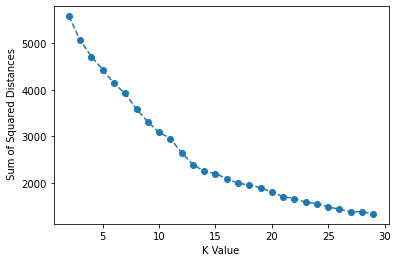

In [29]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

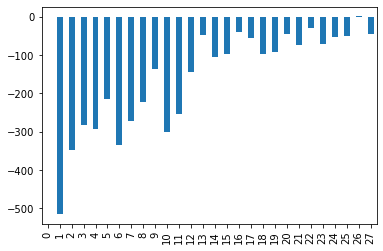

In [30]:
pd.Series(ssd).diff().plot(kind='bar')

In [31]:
#We choose 13 because according to the first plot, we can see that the trend changes a little
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [32]:
model.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [33]:
data['Cluster'] = model.labels_

<AxesSubplot:>

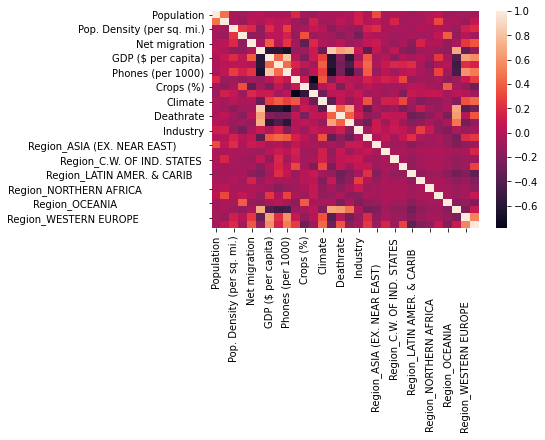

In [34]:
sns.heatmap(data.corr())

In [35]:
#let's see the values for the feature correlation with 'cluster'
data.corr()['Cluster'].sort_values()

Region_LATIN AMER. & CARIB                   -0.349041
Crops (%)                                    -0.280278
Birthrate                                    -0.274573
Region_OCEANIA                               -0.209823
Region_NEAR EAST                             -0.200437
Region_NORTHERN AFRICA                       -0.150023
Agriculture                                  -0.139273
Infant mortality (per 1000 births)           -0.122695
Region_ASIA (EX. NEAR EAST)                  -0.077908
Other (%)                                    -0.076463
Region_C.W. OF IND. STATES                   -0.075861
Population                                   -0.072095
Industry                                     -0.067553
Coastline (coast/area ratio)                 -0.058349
Area (sq. mi.)                                0.065623
Region_NORTHERN AMERICA                       0.075665
Region_SUB-SAHARAN AFRICA                     0.094882
Literacy (%)                                  0.150897
Region_BAL

****

# Using SHAP to properly interpret our clusters

In [36]:
import shap
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




In [37]:
data.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Cluster
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,1
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,2


In [38]:
X= data.drop('Cluster', axis=1)
y=data['Cluster']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


In [40]:
rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [41]:
# Calculate the SHAP values for each feature using the Explainer algorithm
explainer = shap.TreeExplainer(rfc)
shap_values = explainer(X).values
shap_values

array([[[-8.04950898e-03,  5.71811829e-03,  2.33139069e-03],
        [-4.51882154e-04,  6.30805314e-03, -5.85617098e-03],
        [-1.09353803e-03,  3.81913452e-03, -2.72559649e-03],
        ...,
        [-7.16585095e-04,  6.88361369e-04,  2.82237257e-05],
        [ 4.05342134e-02, -4.89367127e-02,  8.40249936e-03],
        [ 3.62566253e-03,  5.87500760e-03, -9.50067013e-03]],

       [[-2.76160711e-03,  1.70562828e-03,  1.05597883e-03],
        [ 2.57422346e-04,  5.41157651e-04, -7.98579998e-04],
        [ 4.67998914e-03, -5.97940755e-04, -4.08204839e-03],
        ...,
        [-1.65544083e-04,  1.30475971e-04,  3.50681123e-05],
        [ 4.38105925e-02, -4.64725891e-02,  2.66199660e-03],
        [ 9.27892572e-03,  1.02196471e-03, -1.03008904e-02]],

       [[-4.97897123e-03,  2.42623486e-03,  2.55273637e-03],
        [ 5.74796843e-03, -1.26669501e-03, -4.48127342e-03],
        [ 6.86861156e-03, -9.29695024e-05, -6.77564206e-03],
        ...,
        [-2.80706928e-04,  2.35621919e-04,

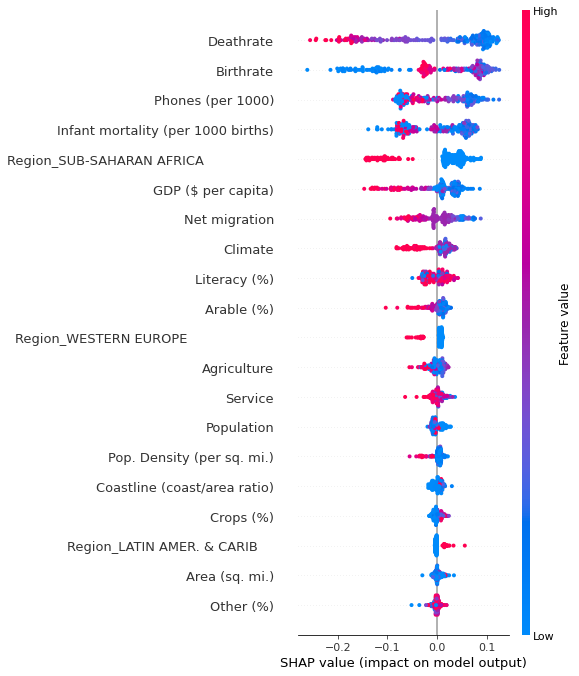

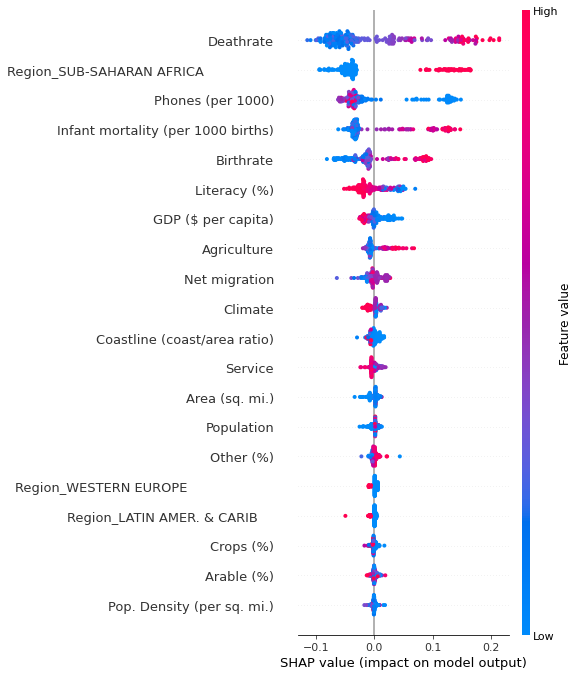

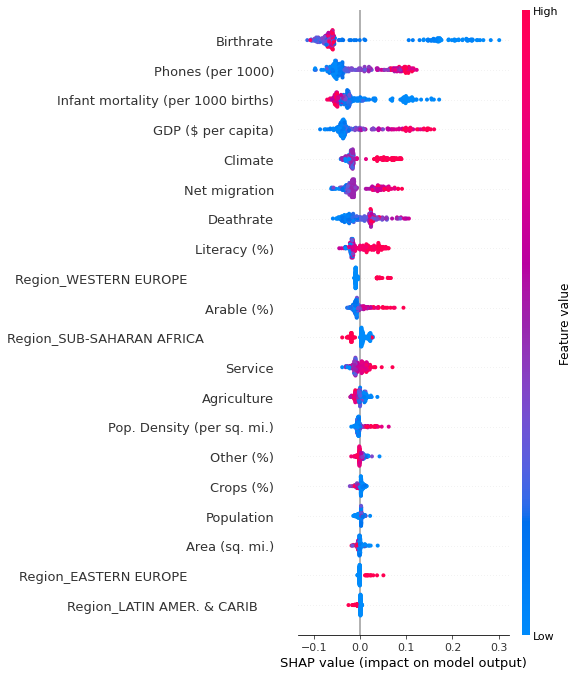

In [42]:
#shap.summary_plot(shap_values, X_train)

for class_index in range(3):
    shap.summary_plot(shap_values[:, :, class_index],X,title=f'SHAP values for class {class_index}',)

##### For the first cluster, we can  explain that high lieracy in Latin America and the carribeans were grouped together
##### For the second cluster, sub saharan African regions with high deathrate and Agriculture were grouped together. For the third,western Europe and Eastern Europe with high pop density, service, literacy,phone, and GDP were grouped together.

##### NB: All effects describe the behavior of the model and are not necessarily causal in the real world.

****

# Interpreting model through visualization of clusters on map

#### Let us plot the clusters out on a country level cloropleth map

In [43]:
!pip install plotly

In [45]:
#read is the ISO codes dataset
iso_codes= pd.read_csv(r"C:\Users\olona\Downloads\DATA SCIENCE\jose portilla\22 - K-Means Clustering\32407460-country-iso-codes.csv")


In [46]:
#conver iso codes into a dictionary
iso_map= iso_codes.set_index('Country')['ISO Code'].to_dict()

In [52]:
#map the distionary to the countries on our dataset
df['ISO CODE']=df['Country'].map(iso_map)

In [53]:
df['ISO CODE']

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
222    NaN
223    NaN
224    YEM
225    ZMB
226    ZWE
Name: ISO CODE, Length: 224, dtype: object

In [54]:
#add your clusters as a column
df['Cluster'] = model.labels_

In [57]:
#plot ma
import plotly.express as px

fig = px.choropleth(df, locations="ISO CODE",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()

##### For the fist cluster, South America, Greenland( Denmark) in North America, North Africa, and Asia were grouped together
##### For the second cluster, Southern, West and East Africa and a bit of Southern Asia are grouped together
##### For the third cluster, Northern America, Europe and Australia and Newzealand belong to the same cluster

##### Notice that groupings are similar to the results gotten from our SHAP summary plots